# Prediksi ***Graduate Admission*** dengan **Klasifikasi** menggunakan **Decision Tree** dan **SVM**

Group 02 - AB B:

1.   Mery Yulinda Rahmi (05211940000003)
2.   Bryan Laurentio Anggoro (05211940000007)
3.   Qolbi Salima Alami (05211940000023)
4.   Putri Rahma Fadhila (05211940000151)





**Tentang Dataset 'Graduate Admission'**

Dataset ini berisi tentang faktor-faktor yang menentukan apakah seseorang dapat diterima untuk studi S2/S3 di universitas-universitas India. Kolom dalam dataset ini meliputi:

1. Serial No : sebagai identifier
2. GRE Score : nilai tes GRE (Graduate Record Examination) (maks. 340)
3. TOEFL Score : nilai tes TOEFL iBT (maks. 120)
4. University Rating : rating universitas (maks. 5)
5. SOP : nilai Statement of Purpose (maks. 5)
6. LOR : nilai Letter of Recommendation (maks. 5)
7. CGPA : nilai Undergraduate GPA (maks. 10)
7. Research : pengalaman riset (Ya / Tidak)
8. Chance of Admit : probabilitas diterima (maks. 1)

# Data Preparation

## Import Library & Load Dataset

In [ ]:
#melakukan import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
# import file dataset Graduate Admission
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


In [ ]:
#membaca file csv dan memasukkannya kedalam variabel df
df = pd.read_csv('Admission_Predict.csv')

In [ ]:
#mengecek 5 data teratas dari df
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4.0,4.5,4.5,9.65,1.0,0.92
1,2,324,107,4.0,4.0,4.5,8.87,1.0,0.76
2,3,316,104,3.0,3.0,3.5,8.00,1.0,0.72
3,4,322,110,3.0,3.5,2.5,8.67,1.0,0.80
4,5,314,103,2.0,2.0,3.0,8.21,0.0,0.65


In [ ]:
#mengecek jumlah kolom dan baris
df.shape

(402, 9)

Terlihat bahwa terdapat **402 baris dan 9 kolom** pada dataset yang tersedia

## Tipe data

In [ ]:
#mengecek tipe data dari masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         402 non-null    int64  
 1   GRE Score          402 non-null    int64  
 2   TOEFL Score        402 non-null    int64  
 3   University Rating  399 non-null    float64
 4   SOP                402 non-null    float64
 5   LOR                402 non-null    float64
 6   CGPA               402 non-null    float64
 7   Research           400 non-null    float64
 8   Chance of Admit    402 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.4 KB


Dapat dilihat bahwa seluruh kolom berupa angka baik integer atau float dan sudah sesuai dengan dataset yang tersedia, sehingga **tidak perlu mengganti tipe data**

## *Statistics summary* dari data

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,402.000000,402.000000,402.000000,399.000000,402.00000,402.000000,402.000000,400.000000,402.000000
mean,200.980100,316.828358,107.405473,3.087719,3.39801,3.450249,8.597985,0.545000,0.724179
std,115.591095,11.452293,6.059742,1.147348,1.00537,0.899577,0.595260,0.498595,0.142302
min,1.000000,290.000000,92.000000,1.000000,1.00000,1.000000,6.800000,0.000000,0.340000
25%,101.250000,308.250000,103.000000,2.000000,2.50000,3.000000,8.170000,0.000000,0.640000
50%,201.500000,317.000000,107.000000,3.000000,3.50000,3.500000,8.610000,1.000000,0.730000
75%,300.750000,325.000000,112.000000,4.000000,4.00000,4.000000,9.060000,1.000000,0.827500
max,400.000000,340.000000,120.000000,5.000000,5.00000,5.000000,9.920000,1.000000,0.970000


## Duplicate values

In [ ]:
#dari kolom-kolom diatas, kolom 'Serial No.' tidak mungkin duplicate, maka kita akan melakukan pengecekan nilai duplicate pada kolom 'Serial No.'
df['Serial No.'].is_unique

False

Dikarenakan seharusnya Serial No. mempunyai nilai unique, dapat diambil kesimpulan bahwa Serial No. **memiliki nilai yang duplikat**

In [ ]:
#terlihat bahwa 'Serial No.' memiliki nilai duplikat, maka kita akan melakukan drop baris yang duplicate
df.drop_duplicates(inplace = True)

In [ ]:
#melakukan pengecekan ulang terkait duplicate pada kolom 'Serial No.'
df['Serial No.'].is_unique

True

Setelah dilakukan drop duplicates, maka Serial No. sudah bersifat **unique dan tidak memiliki nilai yang duplikat**

In [ ]:
#dari 402 baris menjadi 400 baris setelah di drop, berarti terdapat 2 baris yang duplicates
df.shape

(400, 9)

Terlihat bahwa terdapat **400 baris dan 9 kolom** pada dataset yang tersisa, diawal tadi terdapat 402 baris, dapat diambil kesimpulan bahwa **terdapat 2 baris yang duplikat**

## *Missing Values*

In [ ]:
#melakukan pengecekan missing values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    3
SOP                  0
LOR                  0
CGPA                 0
Research             2
Chance of Admit      0
dtype: int64

Terlihat bahwa terdapat **3 missing values pada kolom 'University Rating'** dan **2 missing values pada kolom 'Research'**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


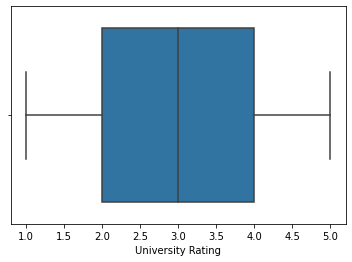

In [ ]:
#cek outlier data pada kolom 'University Rating'
sns.boxplot(df['University Rating'])

Terlihat bahwa **tidak ada outlier** pada kolom 'University Rating', sehingga untuk mengatasi missing values dapat menggunakan **mean**

In [ ]:
#mengecek nilai unique pada kolom 'University Rating'
df['University Rating'].unique()

array([ 4.,  3.,  2.,  5.,  1., nan])

In [ ]:
#tidak terdapat outlier pada kolom 'Univesity  Rating' maka untuk mengatasi missing values dapat menggunakan rata-rata atau mean
df['University Rating'].mean()

3.08816120906801

In [ ]:
#rata-rata 3.0875, tetapi apabila dilihat dari unique value, nilai dari 'University Rating' berupa integer, sehingga 3.0875 dibulatkan menjadi 3
df['University Rating'].fillna(3, inplace = True)

In [ ]:
#cek missing values pada kolom 'University Rating'
df['University Rating'].isna().sum()

0

Setelah diisi dengan **mean**, maka **kolom 'University Rating' sudah tidak memiliki missing values** lagi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


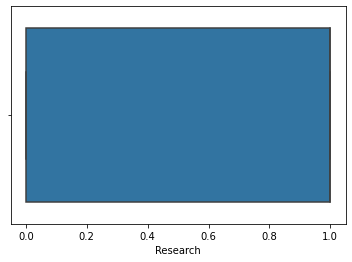

In [ ]:
#cek outlier data pada kolom 'Research'
sns.boxplot(df['Research'])

Terlihat bahwa kolom 'Research' **tidak memiliki outlier**

In [ ]:
#cek outlier data pada kolom 'Research'
df['Research'].unique()

array([ 1.,  0., nan])

In [ ]:
#dapat menggunakan modus karena hanya terdapat 2 unique values yaitu 1 dan 0
df['Research'].mode()

0    1.0
dtype: float64

In [ ]:
#mengisi missing values dengan modus
df['Research'].fillna(1, inplace = True)

In [ ]:
#cek missing values pada kolom 'Research'
df['Research'].isna().sum()

0

Setelah diisi dengan modul, maka **kolom 'Research' sudah tidak memiliki missing values** lagi

In [ ]:
#melakukan pengecekan missing values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Dapat diambil kesimpulan bahwa **tidak terdapat lagi missing values** pada dataset

## Rename nama kolom

In [ ]:
#cek nama kolom
df.head(1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4.0,4.5,4.5,9.65,1.0,0.92


In [ ]:
#mengubah nama kolom untuk mempermudah pengolahan data
df = df.rename(columns={"Serial No.": "SerialNo", "GRE Score": "GRE", "TOEFL Score":"TOEFL", "University Rating": "UnivRating", 
                        "LOR ":"LOR", "Chance of Admit ":"chanceOfAdmit"})

In [ ]:
df.columns

Index(['SerialNo', 'GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'chanceOfAdmit'],
      dtype='object')

# EDA (Exploratory Data Analysis) & membuat kolom kategorikal 'admittedOrNot'

## Pairplot untuk visualisasi **hubungan** antar kolom

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

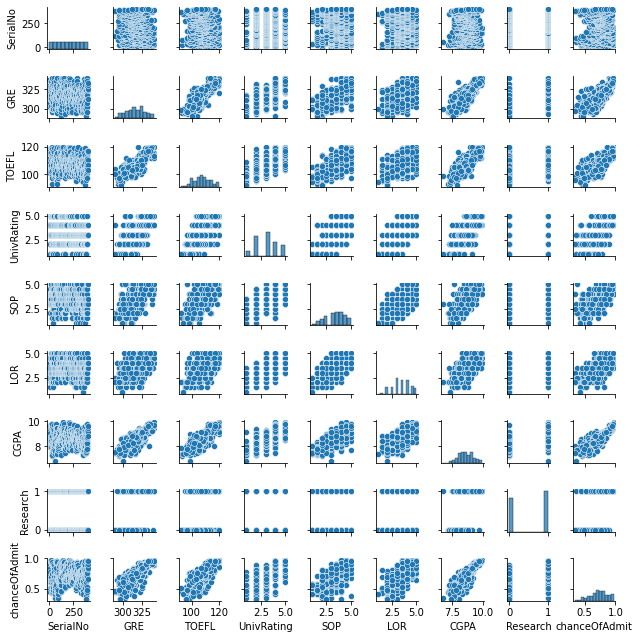

In [ ]:
# menganalisis hubungan antar kolom, khususnya terhadap kolom 'chanceOfAdmit'
plt.figure(figsize=(20,8))
sns.pairplot(df, height=0.5, size=1, aspect=1)

Dari pairplot tersebut, dapat dilihat bahwa CGPA, GRE, TOEFL, SOP, LOR berkorelasi secara linier terhadap chanceOfAdmit. Artinya, semakin tinggi nilai-nilai tersebut, maka nilai chanceOfAdmit juga semakin tinggi.

## Histogram untuk melihat **kecenderungan/skewness** data di tiap kolom

### skewness **chanceOfAdmit**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


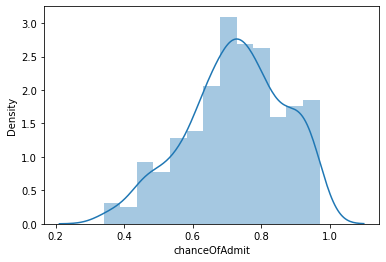

In [ ]:
# menganalisis kecenderungan/skewness data 'chanceOfAdmit' dari visualisasi histogram
sns.distplot(df['chanceOfAdmit'])

Ditunjukkan bahwa data **chanceOfAdmit** berupa ***left-skewed distribution***, yakni lebih condong ke sisi negatif dan mean juga berada di sisi kiri kurva. Artinya, **lebih banyak data** dengan **chanceOfAdmit** yang dapat dikatakan **bernilai rendah**

### membuat kolom kategorikal **admittedOrNot**

In [ ]:
'''
untuk memvisualisasikan kecenderungan data berdasarkan kategori 'mana yang mungkin diterima / tidak', 
maka dapat menggunakan kolom 'chanceOfAdmit'.

Kolom ini data awalnya masih berupa float/desimal, maka perlu diubah menjadi binary (0/1) dengan suatu threshold.

Dengan asumsi dari visualisasi di atas, kita coba menggunakan threshold 0.9 .
if chanceOfAdmit > 0.9 , then 'admitted'
else 'not admitted'
'''
def admitted(x):
  if x > 0.9:
    return 1
  return 0

df['admittedOrNot'] = df['chanceOfAdmit'].apply(admitted)

In [ ]:
df['admittedOrNot'].value_counts()

0    351
1     49
Name: admittedOrNot, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


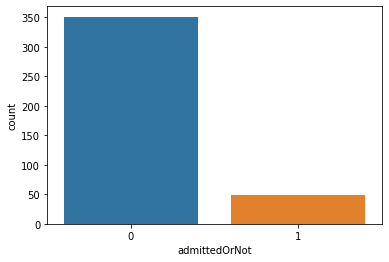

In [ ]:
# menganalisis persebaran data 'admittedOrNot'
sns.countplot(df['admittedOrNot'])

Pada dataset ini, jumlah **data admittedOrNot** dengan **nilai 0 (tidak diterima) lebih banyak** daripada yang bernilai 1 (diterima) sehingga terjadi **ketidakseimbangan data** (*data imbalance*). Kecenderungan data ini kemungkinan dapat mempengaruhi  performa model yang dihasilkan.

### skewness **GRE**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


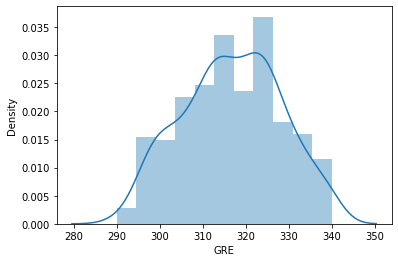

In [ ]:
# menganalisis kecenderungan/skewness data 'GRE' dari visualisasi histogram
sns.distplot(df['GRE'])

Ditunjukkan bahwa data **GRE** berupa ***normal distribution***, yakni data di sisi kanan dan kiri kurva cenderung berjumlah sama banyak dan simetris. Artinya, **data terdistribusi secara merata**. 

### skewness **GRE** berdasarkan **admittedOrNot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


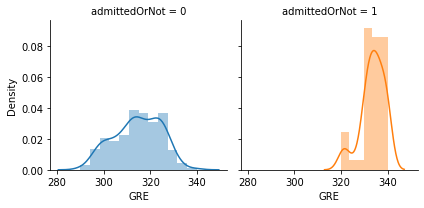

In [ ]:
# menganalisis kecenderungan/skewness data 'GRE' dari visualisasi histogram yang dikategorikan berdasarkan 'admittedOrNot'
g = sns.FacetGrid(data=df, col="admittedOrNot", hue='admittedOrNot')
g.map(sns.distplot, "GRE")

Ditunjukkan bahwa data **GRE** pada **admittedOrNot = 0 (tidak diterima)** **terdistribusi secara normal** kira-kira antara **290 - 340**.

Sedangkan, data **GRE** pada **admittedOrNot = 1 (diterima)**  **terdistribusi secara normal** pada **range nilai yang lebih tinggi,** kira-kira antara **320 - 340**

### skewness **TOEFL**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


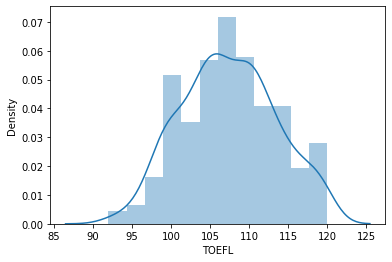

In [ ]:
# menganalisis kecenderungan/skewness data TOEFL dari visualisasi histogram
sns.distplot(df['TOEFL'])

Ditunjukkan bahwa data **TOEFL** berupa ***normal distribution***, yakni data di sisi kanan dan kiri kurva cenderung berjumlah sama banyak dan simetris. Artinya, **data terdistribusi secara merata**. 

### skewness **TOEFL** berdasarkan **admittedOrNot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


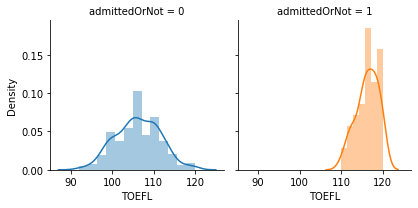

In [ ]:
# menganalisis kecenderungan/skewness data 'TOEFL' dari visualisasi histogram yang dikategorikan berdasarkan 'admittedOrNot'
g = sns.FacetGrid(data=df, col="admittedOrNot", hue='admittedOrNot')
g.map(sns.distplot, "TOEFL")

Ditunjukkan bahwa data **TOEFL** pada **admittedOrNot = 0 (tidak diterima)** **terdistribusi secara normal** kira-kira antara **92 - 120**.

Sedangkan, data **TOEFL** pada **admittedOrNot = 1 (diterima)**  berada pada **range nilai yang lebih tinggi** yakni kira-kira antara **110 - 120** dan **terdistribusi secara normal**.

### skewness **UnivRating**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


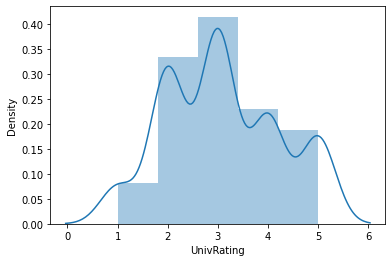

In [ ]:
# menganalisis kecenderungan/skewness data UnivRating dari visualisasi histogram
sns.distplot(df['UnivRating'], bins=5)

Ditunjukkan bahwa data **UnivRating** berupa ***normal distribution***, yakni data di sisi kanan dan kiri kurva cenderung berjumlah sama banyak dan simetris. Artinya, **data terdistribusi secara merata**. 

### skewness **UnivRating** berdasarkan **admittedOrNot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


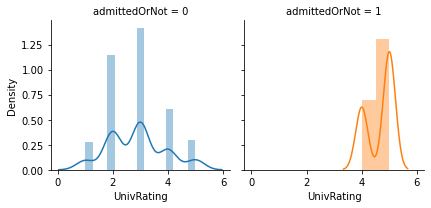

In [ ]:
# menganalisis kecenderungan/skewness data 'UnivRating' dari visualisasi histogram yang dikategorikan berdasarkan 'admittedOrNot'
g = sns.FacetGrid(data=df, col="admittedOrNot", hue='admittedOrNot')
g.map(sns.distplot, "UnivRating")

Ditunjukkan bahwa data **UnivRating** pada **admittedOrNot = 0 (tidak diterima) terdistribusi secara normal** pada **range 1 - 5**.

Sedangkan, **UnivRating** pada **admittedOrNot = 1 (diterima)** dimulai dari **range nilai lebih tinggi** yaitu **4 - 5** dan **terdistribusi secara normal**.

### skewness **SOP**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


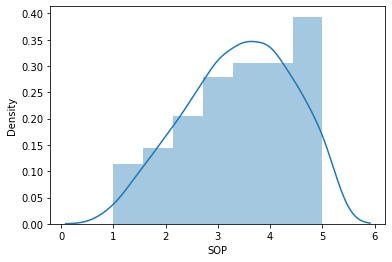

In [ ]:
# menganalisis kecenderungan/skewness data SOP dari visualisasi histogram
sns.distplot(df['SOP'], bins=7)

Ditunjukkan bahwa data **SOP** berupa ***normal distribution***, yakni data di sisi kanan dan kiri kurva cenderung berjumlah sama banyak dan simetris. Artinya, **data terdistribusi secara merata**. 

### skewness **SOP** berdasarkan **chanceOfAdmit**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


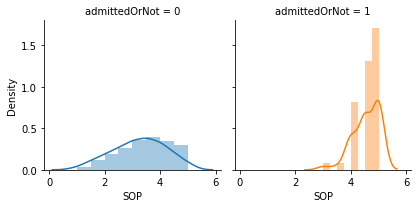

In [ ]:
# menganalisis kecenderungan/skewness data 'SOP' dari visualisasi histogram yang dikategorikan berdasarkan 'admittedOrNot'
g = sns.FacetGrid(data=df, col="admittedOrNot", hue='admittedOrNot')
g.map(sns.distplot, "SOP", bins=8)

Ditunjukkan bahwa data **SOP** pada **admittedOrNot = 0 (tidak diterima) terdistribusi secara normal** pada **range 1 - 5**.

Sedangkan, **SOP** pada **admittedOrNot = 1 (diterima)** dimulai dari **range nilai lebih tinggi** yaitu **3 - 5**, namun berupa ***left-skewed distribution*** atau cenderung pada sisi kiri kurva

### skewness **LOR**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


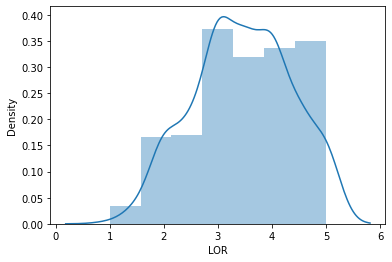

In [ ]:
# menganalisis kecenderungan/skewness data LOR dari visualisasi histogram
sns.distplot(df['LOR'], bins=7)

Ditunjukkan bahwa data **LOR** berupa ***normal distribution***, yakni data di sisi kanan dan kiri kurva cenderung berjumlah sama banyak dan simetris. Artinya, **data terdistribusi secara merata**. 

### skewness **LOR** berdasarkan **chanceOfAdmit**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


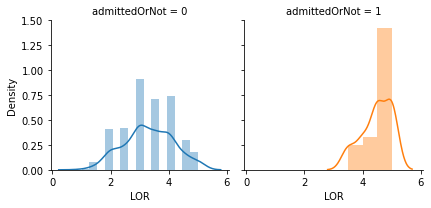

In [ ]:
# menganalisis kecenderungan/skewness data 'LOR' dari visualisasi histogram yang dikategorikan berdasarkan 'admittedOrNot'
g = sns.FacetGrid(data=df, col="admittedOrNot", hue='admittedOrNot')
g.map(sns.distplot, "LOR")

Ditunjukkan bahwa data **LOR** pada **admittedOrNot = 0 (tidak diterima) terdistribusi secara normal** pada **range 1 - 5**.

Sedangkan, **LOR** pada **admittedOrNot = 1 (diterima)** dimulai pada **range nilai lebih tinggi** yaitu sekitar **3.7 - 5** dan berupa ***left-skewed distribution*** atau cenderung pada sisi kiri kurva

### skewness **CGPA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


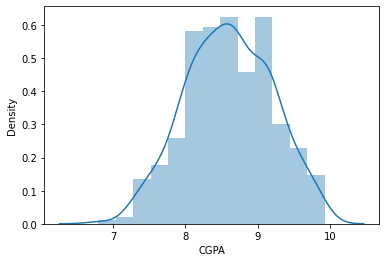

In [ ]:
# menganalisis kecenderungan/skewness data CGPA dari visualisasi histogram
sns.distplot(df['CGPA'])

Ditunjukkan bahwa data **CGPA** berupa ***normal distribution***, yakni data di sisi kanan dan kiri kurva cenderung berjumlah sama banyak dan simetris. Artinya, **data terdistribusi secara merata**. 

### skewness **CGPA** berdasarkan **chanceOfAdmit**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


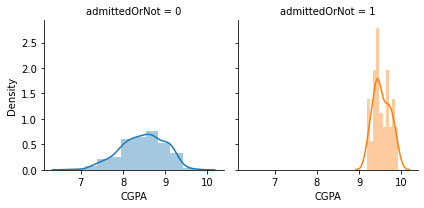

In [ ]:
# menganalisis kecenderungan/skewness data 'CGPA' dari visualisasi histogram yang dikategorikan berdasarkan 'admittedOrNot'
g = sns.FacetGrid(data=df, col="admittedOrNot", hue='admittedOrNot')
g.map(sns.distplot, "CGPA", bins=10)

Ditunjukkan bahwa data **CGPA** pada **admittedOrNot = 0 (tidak diterima) terdistribusi secara normal** kira-kira pada **range 7 - 9.5**.

Sedangkan, **LOR** pada **admittedOrNot = 1 (diterima)** dimulai pada **range nilai lebih tinggi**  kira-kira antara **9.2 - 9.9** dan **terdistribusi secara normal**.

### skewness **Research**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


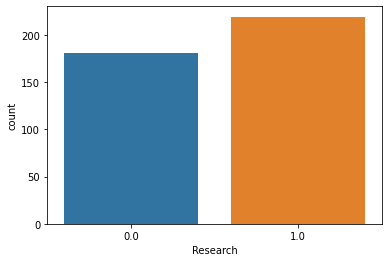

In [ ]:
# menganalisis kecenderungan/skewness data Research Experience ( yes (1) / no (0) ) dari visualisasi countplot
sns.countplot(df['Research'])

Dengan jenis data kolom Research yang bersifat kategorikal, maka digunakan countplot. 

Dari visualisasi di atas, ditunjukkan bahwa **lebih banyak data dengan nilai 1 (Has research experience)** daripada data dengan nilai 0 (Has no research experience)

### skewness **Research** berdasarkan **admittedOrNot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


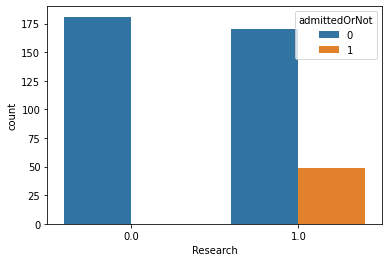

In [ ]:
# menganalisis kecenderungan/skewness data 'Research' dari visualisasi histogram yang dikategorikan berdasarkan 'admittedOrNot'
sns.countplot(df['Research'], hue=df['admittedOrNot'])

Dari visualisasi di atas, ditunjukkan bahwa jika **Research = 0 (Has no research experience)** maka **admittedOrNot = 0 (tidak diterima)**.

Kemudian, jika **Research = 1 (Has research experience)**, maka **jumlah admittedOrNot = 0 (tidak diterima) tetap lebih tinggi** dari **admittedOrNot = 1 (diterima)**.

Hal ini menunjukkan bahwa ***research experience* tidak terlalu berpengaruh** pada probabilitas diterima/tidak dalam *graduate admission*

## **Korelasi**

In [ ]:
#mengecek korelasi antar kolom
df.corr()

,SerialNo,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,chanceOfAdmit,admittedOrNot
SerialNo,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336,-0.079078
GRE,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610,0.547922
TOEFL,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594,0.547063
UnivRating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250,0.512077
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732,0.431451
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889,0.427652
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289,0.588464
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202,0.339674
chanceOfAdmit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000,0.559280
admittedOrNot,-0.079078,0.547922,0.547063,0.512077,0.431451,0.427652,0.588464,0.339674,0.559280,1.000000


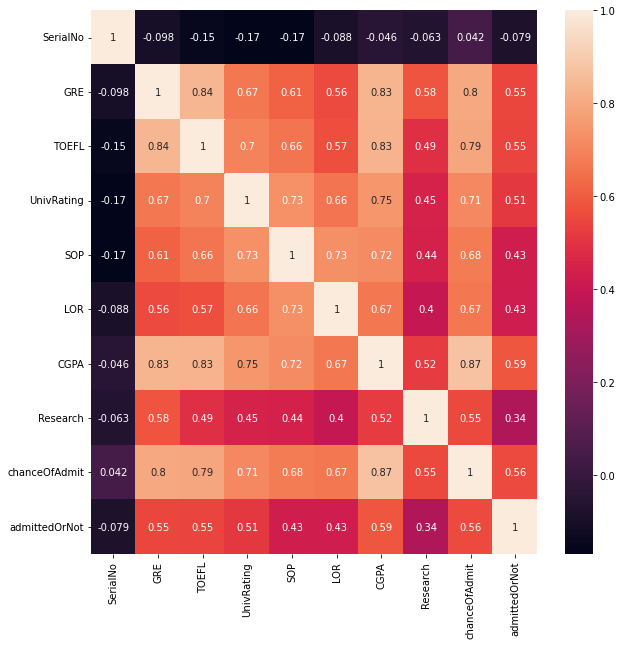

In [ ]:
#membuat heatmap berdasarkan korelasi
fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(df.corr(), annot=True)

Terlihat bahwa korelasi terhadap admittedOrNot dari yang tertinggi adalah:
CGPA > GRE > TOEFL > UnivRating > SOP > LOR > Research

# Data Pre-processing

## Feature Selection

In [ ]:
#mengambil kolom-kolom yang berkorelasi untuk dijadikan sebuah features dan menentukan kolom untuk prediksi
feature_cols = ['GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR', 'CGPA','Research']
X = df[feature_cols]  #X merupakan features yang digunakan untuk prediksi
y = df['admittedOrNot'] #y merupakan kolom Target yang berisi label 1 (diterima) dan 0 (tidak diterima)

## Random Oversampling untuk mengatasi Data Imbalance

In [ ]:
# mengatasi data imbalance antara jumlah label admittedOrNot = 1 dan = 0 dengan RandomOverSampler

from imblearn.over_sampling import RandomOverSampler
'''
strateginya menggunakan minority (oversampling) dikarenakan pada tahap EDA, mahasiswa yang tidak diterima jauh lebih banyak dari pada yang diterima
sehingga strategi minority digunakan untuk membuat chanceOfAdmit terutama untuk data berlabel 1 bisa setara dengan data berlabel 0.

data berlabel 1 yang awalnya hanya sejumlah 49, akan mengikuti jumlah label 0 yakni sejumlah 351.
sehingga total sample akan menjadi : 

jumlah label 1 + jumlah label 0 
= 351 + 351 = 702
'''
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X, y = oversample.fit_resample(X,y)

In [ ]:
X.shape, y.shape

((702, 7), (702,))

In [ ]:
y.value_counts()

1    351
0    351
Name: admittedOrNot, dtype: int64

Terlihat bahwa data chanceOfAdmit memiliki jumlah yang sama

## Scaling data

###Scaling dengan **normalisasi** menggunakan **MinMaxScaler**

In [ ]:
# Melakukan scaling dengan Normalisasi pada data features (yang sebelumnya telah disimpan pada variabel X)
'''
Normalisasi tsb. bertujuan u/ mengubah data agar memiliki range yang sama, yakni [0,1] sehingga meminimalisir terjadinya dominasi data.
Rumus normalisasi :
    y = (x – min) / (max – min)
'''

from sklearn.preprocessing import MinMaxScaler

# definisikan scaler
scaler_norm = MinMaxScaler()

# transform data
X = scaler_norm.fit_transform(X)
print(X)
print(X.shape)

[[0.94       0.92857143 0.75       ... 0.875      0.91346154 1.        ]
 [0.68       0.53571429 0.75       ... 0.875      0.66346154 1.        ]
 [0.52       0.42857143 0.5        ... 0.625      0.38461538 1.        ]
 ...
 [0.82       0.85714286 1.         ... 0.75       0.78846154 1.        ]
 [0.86       0.92857143 1.         ... 1.         0.81730769 1.        ]
 [0.8        0.85714286 1.         ... 0.875      0.82051282 1.        ]]
(702, 7)


###Scaling dengan **standardisasi** menggunakan **StandardScaler**

In [ ]:
# Melakukan scaling dengan Standardisasi pada data features (yang sebelumnya telah disimpan pada variabel X)
'''
Standarisasi tsb. bertujuan u/ menstandarkan mean dan varians dari data, yakni mean = 0 dan standar deviasi = 1 (distribusi normal)
serta nilai berada di rentang [-1,1]. Hal ini dapat juga digunakan untuk meminimalisir terjadinya dominasi pada data.

Rumus standardisasi :
    y = (x – mean) / standard_deviation
    
    *dengan
    mean = sum(x) / count(x)
    standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))
'''

# uncomment di bawah ini untuk eksperimen menggunakan standardisasi

# from sklearn.preprocessing import StandardScaler

# # definisikan scaler
# scaler_std = StandardScaler()

# # transform data
# X = scaler_std.fit_transform(X)
# print(X)
# print(X.shape)


[[ 1.05049698  1.03660351  0.19668026 ...  0.6836613   0.99894735
   0.58941397]
 [ 0.00218255 -0.64398694  0.19668026 ...  0.6836613  -0.19377749
   0.58941397]
 [-0.64293402 -1.10232978 -0.63506396 ... -0.42472261 -1.52412443
   0.58941397]
 ...
 [ 0.56665955  0.73104161  1.02842447 ...  0.12946934  0.40258493
   0.58941397]
 [ 0.72793869  1.03660351  1.02842447 ...  1.23785325  0.54020703
   0.58941397]
 [ 0.48601998  0.73104161  1.02842447 ...  0.6836613   0.55549837
   0.58941397]]
(702, 7)


## Splitting Data

In [ ]:
#membagi train dan test dataset, training data sebanyak 70 persen dan testing data sebanyak 30 persen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#mengecek kolom dan baris dari Test & Training dataset.
print(X_train.shape, X_test.shape) #X_train = 491 baris & 7 kolom. Sedangkan, X_test = 211 baris & 7 kolom
print(y_train.shape, y_test.shape) #y_train = 491 baris & 1 kolom. Sedangkan, y_test = 211 baris & 1 kolom.

(491, 7) (211, 7)
(491,) (211,)


In [ ]:
y_train.value_counts() #mengecek jumlah label 1 dan 0 pada kolom Target di Training Dataset (y_train)

1    254
0    237
Name: admittedOrNot, dtype: int64

In [ ]:
y_test.value_counts() #mengecek jumlah label 1 dan 0 pada kolom Target di Test Dataset (y_test)

0    114
1     97
Name: admittedOrNot, dtype: int64

# Modeling & Evaluation

## Algoritma Machine Learning 1: Decision Tree Classifier

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### Sekilas terkait metriks klasifikasi

#### **Precision, Recall, F1-Score**

Precision: Digunakan saat fokus meminimalkan ***false positives***.

Recall: Digunakan saat fokus meminimalkan ***false negatives***.

Precision (jumlah prediksi kelas positif dari keseluruhan kelas positif) = TP/ TP + FP

Recall (jumlah prediksi kelas positif yang sebenarnya milik kelas positif) = TP/ TP + FN

F1-Score (ukuran akurasi suatu tes. Ini dihitung dari presisi dan penarikan kembali tes)= (2*Precision*Recall)/(Precision+Recall)

**F1-Score** lebih cocok **digunakan saat** fokusnya adalah **memaksimalkan akurasi kelas Positif saja**.

#### **Sensitivity, Specificity, Balanced Accuracy**

Sensitivity (*true positive rate*) = Recall = TP / TP + FN

Specificity (*true negative rate*) = TN / TN + FP

Balanced accuracy score (rata-rata akurasi dari kelas positif dan negatif) = Sensitivity + Specificity / 2

**Balanced accuracy score** digunakan saat **akurasi kedua kelas (kelas positif dan negatif) sama-sama penting**. 

Maka, **dalam hal ini, digunakan** metriks ***balanced accuracy score*** untuk evaluasi model.

### Eksperimen terhadap parameter Decision Tree:

1. **Criterion** (Mengukur ketidakakuratan pemberian label): Gini (1-P(x)^2+P(y)^2), Entropy (P(x) * log2(P(x)) - (P(y) * log2(P(y))
2. **Splitter** : Best (memilih splitter terbaik), Random (memilih splitter secara random)
3. **Max Depth**: kedalaman tree

#### **Skenario 1**: Default, tidak mengubah hyperparameter dan MinMaxScaler

Criterion: 'gini' (default)

Splitter: 'best' (default)

Max-depth: None (default)

In [ ]:
#definisikan Decision Tree Classifier
clf = DecisionTreeClassifier(random_state = 42)

#training data dengan Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#prediksi test data dengan Decision Tree Classifier
y_pred_clf = clf.predict(X_test)

#evaluasi hasil prediksi
print(metrics.balanced_accuracy_score(y_test, y_pred_clf))
print(metrics.classification_report(y_test, y_pred_clf))

0.9956140350877193
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      1.00      0.99        97

    accuracy                           1.00       211
   macro avg       0.99      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



#### **Skenario 2**: Manual, MinMaxScaler, No Cross-validation

- dilakukan secara **manual** menggunakan for loops
- scaling data dengan normalisasi **MinMaxScaler**
- **tanpa cross validation** artinya seluruh data training langsung di-training dalam sekali waktu

In [ ]:
# Membuat variabel untuk menyimpan hyperparameter Criterion, Splitter, Max_depth yang akan digunakan untuk eksperimen
criterion = ["gini", "entropy"]
splitter = ['best', 'random']
max_depth = [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]

# Membuat variabel DataFrame bernama 'result1' untuk menyimpan Report hasil eksperimen hyperparameter nantinya
result1 = pd.DataFrame({'criterion':[], 'splitter':[], 'max_depth':[], 'balanced_accuracy_score':[]})


# for loop digunakan untuk iterasi terhadap Cartesian product / persilangan antar elemen dalam variabel criterion, splitter, max_depth
for criterion, splitter, max_depth in itertools.product(criterion, splitter, max_depth):
  
  #definisikan Decision Tree Classifier
  clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, random_state=42)

  #training data dengan Decision Tree clasifier
  clf = clf.fit(X_train,y_train)

  #prediksi test data dengan Decision Tree classifier
  y_pred_clf = clf.predict(X_test)

  #evaluasi hasil prediksi dimasukkan dalam tabel 'result'
  result1 = result1.append({'criterion':criterion, 'splitter':splitter, 'max_depth':max_depth, 'balanced_accuracy_score':metrics.balanced_accuracy_score(y_test, y_pred_clf)}, ignore_index=True)

In [ ]:
# mengecek Report hasil eksperimen hyperparameter, yakni diambil 5 eksperimen dengan Balanced Accuracy Score tertinggi
result1.sort_values('balanced_accuracy_score',ascending=False).head()

,criterion,splitter,max_depth,balanced_accuracy_score
29,gini,random,30.0,1.0
32,gini,random,70.0,1.0
30,gini,random,40.0,1.0
33,gini,random,90.0,1.0
28,gini,random,20.0,1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


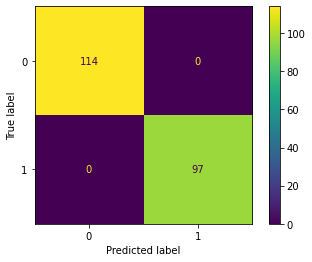

In [ ]:
# mengimplementasikan hyperparameter yang menghasilkan akurasi tertinggi untuk Training dan Prediksi terhadap Test dataset

# buat Classifier dan sesuaikan hyperparameter
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=30, random_state=42)

# Training data dengan Classifier tersebut
clf = clf.fit(X_train,y_train)

# plot Hasil Prediksi terhadap Test dataset dalam bentuk Confusion Matrix
metrics.plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

#### **Skenario 3**: Manual, StandardScaler, No Cross-validation

- dilakukan secara **manual** menggunakan for loops
- scaling data dengan normalisasi **StandardScaler**
- **tanpa cross validation** artinya seluruh data training langsung di-training dalam sekali waktu

In [ ]:
# Membuat variabel untuk menyimpan hyperparameter Criterion, Splitter, Max_depth yang akan digunakan untuk eksperimen
criterion = ["gini", "entropy"]
splitter = ['best', 'random']
max_depth = [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]

# Membuat variabel DataFrame bernama 'result2' untuk menyimpan Report hasil eksperimen hyperparameter nantinya
result2 = pd.DataFrame({'criterion':[], 'splitter':[], 'max_depth':[], 'balanced_accuracy_score':[]})


# for loop digunakan untuk iterasi terhadap Cartesian product / persilangan antar elemen dalam variabel criterion, splitter, max_depth
for criterion, splitter, max_depth in itertools.product(criterion, splitter, max_depth):
  
  #definisikan Decision Tree Classifier
  clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, random_state=42)

  #training data dengan Decision Tree Classifier
  clf = clf.fit(X_train,y_train)

  #prediksi test data dengan Decision Tree Classifier
  y_pred_clf = clf.predict(X_test)

  #evaluasi hasil prediksi dimasukkan dalam tabel 'result'
  result2 = result2.append({'criterion':criterion, 'splitter':splitter, 'max_depth':max_depth, 'balanced_accuracy_score':metrics.balanced_accuracy_score(y_test, y_pred_clf)}, ignore_index=True)

In [ ]:
# mengecek Report hasil eksperimen hyperparameter, yakni diambil 5 eksperimen dengan Balanced Accuracy Score tertinggi
result2.sort_values('balanced_accuracy_score',ascending=False).head()

,criterion,splitter,max_depth,balanced_accuracy_score
29,gini,random,30.0,1.0
32,gini,random,70.0,1.0
30,gini,random,40.0,1.0
33,gini,random,90.0,1.0
28,gini,random,20.0,1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


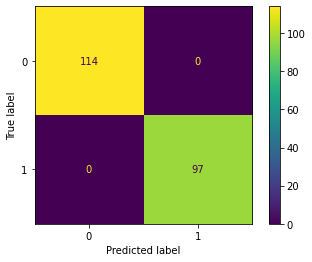

In [ ]:
# mengimplementasikan hyperparameter yang menghasilkan akurasi tertinggi untuk Training dan Prediksi terhadap Test dataset

# buat Classifier dan sesuaikan hyperparameter
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=30, random_state=42)

# Training data dengan Classifier tersebut
clf = clf.fit(X_train,y_train)

# plot Hasil Prediksi terhadap Test dataset dalam bentuk Confusion Matrix
metrics.plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

#### **Skenario 4**: GridSearchCV, MinMaxScaler, Cross-validation
- dilakukan *hyperparameter tuning* menggunakan **GridSearchCV**
- scaling data dengan normalisasi **MinMaxScaler**
- dilakukan **cross validation** dengan k-fold = 5

##### **Sekilas tentang GridSearchCV**
_**Grid search** merupakan **metode/pendekatan** untuk melakukan **hyper-parameter tuning** yang bertujuan meningkatkan akurasi model dengan cara **menyilangkan/mengkombinasikan seluruh kemungkinan model/algoritma & hyperparameter** dan dapat diuji dengan **cross-validation** (membagi dataset menjadi beberapa 'fold'/set), dimana **seluruh kemungkinan tersebut akan dievaluasi**._

_Dinamakan **"grid search"** karena persilangan tersebut umumnya dapat dilakukan dengan menyilangkan antar kolom membentuk **'grid'** seperti berikut._

_Gambar grid search:_
https://drive.google.com/file/d/1Q_1tkkkipRtiLDqiu64i-IqX7gzTJGmq/view?usp=sharing

_Sedangkan, **cross-validation K-fold** adalah membagi dataset menjadi beberapa 'fold' seperti berikut. Dalam hal ini, karena merupakan Classification, maka perlu dilakukan **Stratified K-fold** yakni mengatur pembagian dataset sedemikian rupa sehingga **proporsi kelas/label di tiap set nya seimbang**._

_Gambar Stratified K-fold:_
https://miro.medium.com/max/562/0*QKJTHrcriSx2ZNYr.png

_Referensi:_
https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

In [ ]:
# Membuat variabel untuk menyimpan hyperparameter yang akan digunakan untuk eksperimen
opsi_parameter = {"criterion": ["gini", "entropy"],
                  "splitter":['best', 'random'],
                  'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

# Definisikan GridSearchCV yang meliputi Model Algoritma, list Hyperparameter, 
# Metriks Evaluasi (scoring), dan jumlah K-fold
grid_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=opsi_parameter, 
                                  scoring='balanced_accuracy', cv=5)

# GridSearchCV di-training terhadap Training dataset
grid_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'splitter': ['best', 'random']},
             scoring='balanced_accuracy')

In [ ]:
# mengecek Hyperparameter yang menghasilkan skor akurasi tertinggi terhadap Training dataset
print(grid_decision_tree.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'splitter': 'random'}


In [ ]:
# mengecek nilai skor akurasi tertinggi terhadap Training Dataset
grid_decision_tree.best_score_

0.9791119107217355

In [ ]:
# mengecek 5 kombinasi Hyperparameter yang menghasilkan skor akurasi tertinggi terhadap Training dataset
cvResult = pd.DataFrame(grid_decision_tree.cv_results_)
cvResult[['param_criterion','param_splitter','param_max_depth','mean_test_score','rank_test_score']].sort_values('rank_test_score',ascending=True).head()

,param_criterion,param_splitter,param_max_depth,mean_test_score,rank_test_score
35,gini,random,150,0.979112,1
27,gini,random,50,0.979112,1
21,gini,random,20,0.979112,1
29,gini,random,70,0.979112,1
19,gini,random,15,0.979112,1


0.9956140350877193
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      1.00      0.99        97

    accuracy                           1.00       211
   macro avg       0.99      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


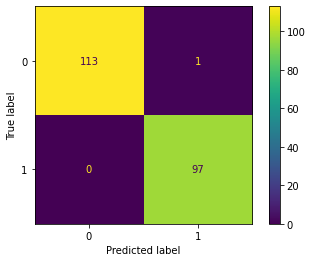

In [ ]:
# melakukan Prediksi dengan Model dan Hyperparameter terbaik terhadap Test dataset
grid_decisiontree_prediction = grid_decision_tree.predict(X_test)

# mengevaluasi skor akurasi
print(metrics.balanced_accuracy_score(y_test,grid_decisiontree_prediction))
print(metrics.classification_report(y_test, grid_decisiontree_prediction))

# plot Hasil Prediksi terhadap Test dataset ke dalam Confusion Matrix
metrics.plot_confusion_matrix(grid_decision_tree, X_test, y_test)  
plt.show()

#### **Skenario 5**: GridSearchCV, StandardScaler, Cross-validation

- dilakukan *hyperparameter tuning* menggunakan **GridSearchCV**
- scaling data dengan standardisasi **StandardScaler** 
- dilakukan **cross-validation** dengan k-fold = 5

In [ ]:
# Membuat variabel untuk menyimpan hyperparameter yang akan digunakan untuk eksperimen
opsi_parameter = {"criterion": ["gini", "entropy"],
                  "splitter":['best', 'random'],
                  'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

# Definisikan GridSearchCV yang meliputi Model Algoritma, list Hyperparameter, 
# Metriks Evaluasi (scoring), dan jumlah K-fold
grid_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=opsi_parameter, 
                                  scoring='balanced_accuracy', cv=5)

# GridSearchCV di-training terhadap Training dataset
grid_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'splitter': ['best', 'random']},
             scoring='balanced_accuracy')

In [ ]:
# mengecek Hyperparameter yang menghasilkan skor akurasi tertinggi terhadap Training dataset
print(grid_decision_tree.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'splitter': 'random'}


In [ ]:
# mengecek nilai skor akurasi tertinggi terhadap Training Dataset
grid_decision_tree.best_score_

0.9791119107217355

In [ ]:
# mengecek 5 kombinasi Hyperparameter yang menghasilkan skor akurasi tertinggi terhadap Training dataset
cvResult = pd.DataFrame(grid_decision_tree.cv_results_)
cvResult[['param_criterion','param_splitter','param_max_depth','mean_test_score','rank_test_score']].sort_values('rank_test_score',ascending=True).head()

,param_criterion,param_splitter,param_max_depth,mean_test_score,rank_test_score
35,gini,random,150,0.979112,1
27,gini,random,50,0.979112,1
21,gini,random,20,0.979112,1
29,gini,random,70,0.979112,1
19,gini,random,15,0.979112,1


0.9956140350877193
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      1.00      0.99        97

    accuracy                           1.00       211
   macro avg       0.99      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


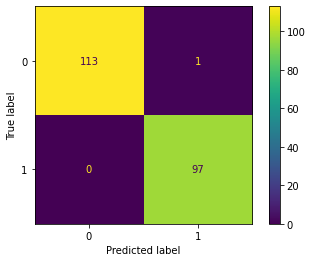

In [ ]:
# melakukan Prediksi dengan Model dan Hyperparameter terbaik terhadap Test dataset
grid_decisiontree_prediction = grid_decision_tree.predict(X_test)

# mengevaluasi skor akurasi
print(metrics.balanced_accuracy_score(y_test,grid_decisiontree_prediction))
print(metrics.classification_report(y_test, grid_decisiontree_prediction))

# plot Hasil Prediksi terhadap Test dataset ke dalam Confusion Matrix
metrics.plot_confusion_matrix(grid_decision_tree, X_test, y_test)  
plt.show()

## Algoritma Machine Learning 2: SVM (Support Vector Machine)

### Eksperimen terhadap parameter SVM:

1. **Kernel** : Linear, Polynomial, RBF (Radial Basis Function), Sigmoid
2. **C (Regularisation)** : C digunakan untuk mengatur batas error yang dapat diterima. Jika C = 0, maka disebut _hard margin_ yakni tidak boleh ada error, namun ini akan menyebabkan _overfitting_. Maka, sebaiknya diatur C > 0. 
3. **Gamma** (untuk kernel RBF, Polynomial, Sigmoid): Gamma menentukan kurva/garis pembatas antar kelas dalam penggunaan kernel RBF, Polynomial, dan Sigmoid. Jika Gamma tinggi, maka akan semakin menyesuaikan bentuk sebaran data pada masing-masing kelas. Apabila nilai Gamma terlalu tinggi, dapat menyebabkan _overfitting_ dan apabila Gamma terlalu rendah, dapat menyebabkan _underfitting_. Gamma dapat diatur sebagai 'scale', 'auto', atau dengan menspesifikkan desimal tertentu.

Gamma 'scale' = 1 / (n_features * X.var())

Gamma ‘auto’ =  1 / n_features

4. **Degree** (untuk kernel Polynomial): menspesifikasikan derajat (pangkat tertinggi) polinomial

Referensi kernel: https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

Referensi C dan Gamma: https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

#### **Skenario 1**: Default, tidak mengubah hyperparameter dan MinMaxScaler

Kernel: 'rbf' (default)

C :1.0 (default)

Gamma : Auto (default)

In [ ]:
#definisikan SVM classifier
svmClassifier = SVC()

#training data dengan SVM
svmClassifier.fit(X_train, y_train)

#prediksi test data dengan SVM
y_pred_svm = svmClassifier.predict(X_test)

#evaluasi hasil prediksi
print(metrics.balanced_accuracy_score(y_test, y_pred_svm))
print(metrics.classification_report(y_test, y_pred_svm))

0.9780701754385965
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       114
           1       0.95      1.00      0.97        97

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211



#### **Skenario 2**: Manual, MinMaxScaler, No Cross-validation

- dilakukan secara **manual** menggunakan for loops
- scaling data dengan normalisasi **MinMaxScaler**
- **tanpa cross validation** artinya seluruh data training langsung di-training dalam sekali waktu

In [ ]:
# Membuat variabel untuk menyimpan hyperparameter Kernel, C, Gamma, Degree yang akan digunakan untuk eksperimen
kernel = ['rbf','linear','poly','sigmoid']
C = [0.1, 1, 3, 8, 10, 100]
gamma = ['scale','auto',1,0.04,0.5,0.1,0.01,0.001]
degree = [3,4,5,6,7,8]

# Membuat variabel DataFrame bernama 'result1' untuk menyimpan Report hasil eksperimen hyperparameter nantinya
result1 = pd.DataFrame({'kernel':[], 'C':[], 'gamma':[], 'degree':[], 'balanced_accuracy_score':[]})

# for loop digunakan untuk iterasi terhadap Cartesian product / persilangan antar elemen dalam variabel kernel, C, gamma, degree
for kernel, C, gamma, degree in itertools.product(kernel,C,gamma,degree):
  
  #definisikan SVM classifier
  svmClassifier = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)

  #training data dengan SVM clasifier
  svmClassifier.fit(X_train, y_train)

  #prediksi test data dengan SVM classifier
  y_pred = svmClassifier.predict(X_test)

  #evaluasi hasil prediksi dimasukkan dalam tabel 'result1'
  result1 = result1.append({'kernel':kernel, 'C':C, 'gamma':gamma, 'degree':degree, 'balanced_accuracy_score':metrics.balanced_accuracy_score(y_test, y_pred)}, ignore_index=True)

In [ ]:
# mengecek Report hasil eksperimen hyperparameter, yakni diambil 5 eksperimen dengan Balanced Accuracy Score tertinggi
result1.sort_values('balanced_accuracy_score',ascending=False).head()

,kernel,C,gamma,degree,balanced_accuracy_score
687,poly,3.0,1,6.0,1.0
579,poly,0.1,scale,6.0,1.0
240,rbf,100.0,scale,3.0,1.0
241,rbf,100.0,scale,4.0,1.0
242,rbf,100.0,scale,5.0,1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


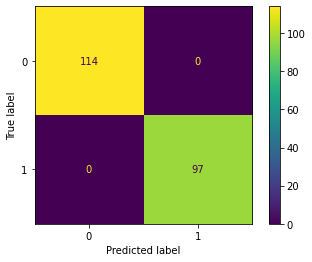

In [ ]:
# mengimplementasikan hyperparameter yang menghasilkan akurasi tertinggi untuk Training dan Prediksi terhadap Test dataset

# buat Classifier dan sesuaikan hyperparameter
svmClassifier = SVC(kernel='poly', C=3, gamma=1, degree=6)

# Training data dengan Classifier tersebut
svmClassifier.fit(X_train, y_train)

# plot Hasil Prediksi terhadap Test dataset dalam bentuk Confusion Matrix
metrics.plot_confusion_matrix(svmClassifier, X_test, y_test)  
plt.show()

#### **Skenario 3**: Manual, StandardScaler, No Cross-validation

- dilakukan secara **manual** menggunakan for loops
- scaling data dengan normalisasi **StandardScaler**
- **tanpa cross validation** artinya seluruh data training langsung di-training dalam sekali waktu

In [ ]:
# Membuat variabel untuk menyimpan hyperparameter Kernel, C, Gamma, Degree yang akan digunakan untuk eksperimen
kernel = ['rbf','linear','poly','sigmoid']
C = [0.1, 1, 3, 8, 10, 100]
gamma = ['scale','auto',1,0.04,0.5,0.1,0.01,0.001]
degree = [3,4,5,6,7,8]

# Membuat variabel DataFrame bernama 'result2' untuk menyimpan Report hasil eksperimen hyperparameter nantinya
result2 = pd.DataFrame({'kernel':[], 'C':[], 'gamma':[], 'degree':[], 'balanced_accuracy_score':[]})

# for loop digunakan untuk iterasi terhadap Cartesian product / persilangan antar elemen dalam variabel kernel, C, gamma, degree
for kernel, C, gamma, degree in itertools.product(kernel,C,gamma,degree):
  
  #definisikan SVM classifier
  svmClassifier = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)

  #training data dengan SVM clasifier
  svmClassifier.fit(X_train, y_train)

  #prediksi test data dengan SVM classifier
  y_pred = svmClassifier.predict(X_test)

  #evaluasi hasil prediksi dimasukkan dalam tabel 'result1'
  result2 = result2.append({'kernel':kernel, 'C':C, 'gamma':gamma, 'degree':degree, 'balanced_accuracy_score':metrics.balanced_accuracy_score(y_test, y_pred)}, ignore_index=True)

In [ ]:
# mengecek Report hasil eksperimen hyperparameter, yakni diambil 5 eksperimen dengan Balanced Accuracy Score tertinggi
result2.sort_values('balanced_accuracy_score',ascending=False).head()

,kernel,C,gamma,degree,balanced_accuracy_score
208,rbf,10.0,1,7.0,1.0
245,rbf,100.0,scale,8.0,1.0
217,rbf,10.0,0.5,4.0,1.0
218,rbf,10.0,0.5,5.0,1.0
219,rbf,10.0,0.5,6.0,1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


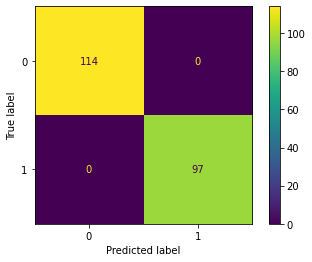

In [ ]:
# mengimplementasikan hyperparameter yang menghasilkan akurasi tertinggi untuk Training dan Prediksi terhadap Test dataset

# buat Classifier dan sesuaikan hyperparameter
svmClassifier = SVC(kernel='rbf', C=10, gamma=1)

# Training data dengan Classifier tersebut
svmClassifier.fit(X_train, y_train)

# plot Hasil Prediksi terhadap Test dataset dalam bentuk Confusion Matrix
metrics.plot_confusion_matrix(svmClassifier, X_test, y_test)  
plt.show()

#### **Skenario 4**: GridSearchCV, MinMaxScaler, Cross-validation
- dilakukan *hyperparameter tuning* menggunakan **GridSearchCV**
- scaling data dengan normalisasi **MinMaxScaler**
- dilakukan **cross validation** dengan k-fold = 5

In [ ]:
# Membuat variabel untuk menyimpan hyperparameter yang akan digunakan untuk eksperimen
opsi_parameter = {'C': [0.1, 1, 3, 8, 10, 100], 'gamma': ['auto','scale',1,0.04,0.5,0.1,0.01,0.001],
                  'degree':[3,4,5,6,7,8], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

# Definisikan GridSearchCV yang meliputi Model Algoritma, list Hyperparameter, 
# Metriks Evaluasi (scoring), dan jumlah K-fold
grid = GridSearchCV(SVC(), param_grid=opsi_parameter, scoring='balanced_accuracy', cv=5)

# GridSearchCV di-training terhadap Training dataset
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 3, 8, 10, 100],
                         'degree': [3, 4, 5, 6, 7, 8],
                         'gamma': ['auto', 'scale', 1, 0.04, 0.5, 0.1, 0.01,
                                   0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='balanced_accuracy')

In [ ]:
# mengecek Hyperparameter yang menghasilkan skor akurasi tertinggi terhadap Training dataset
print(grid.best_params_)

{'C': 0.1, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
# mengecek nilai skor akurasi tertinggi terhadap Training Dataset
grid.best_score_

0.9832446808510639

In [ ]:
# mengecek 5 kombinasi Hyperparameter yang menghasilkan skor akurasi tertinggi terhadap Training dataset
cvResult = pd.DataFrame(grid.cv_results_)
cvResult[['param_kernel','param_C','param_gamma','param_degree','mean_test_score','rank_test_score']].sort_values('rank_test_score',ascending=True).head()

,param_kernel,param_C,param_gamma,param_degree,mean_test_score,rank_test_score
69,poly,0.1,scale,5,0.983245,1
773,poly,10,scale,3,0.983245,1
229,poly,1,scale,4,0.983245,1
369,poly,1,0.5,8,0.983245,1
581,poly,8,scale,3,0.983245,1


0.9956140350877193
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      1.00      0.99        97

    accuracy                           1.00       211
   macro avg       0.99      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


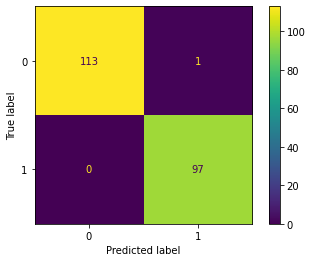

In [ ]:
# melakukan Prediksi dengan Model dan Hyperparameter terbaik terhadap Test dataset
grid_SVM_prediction = grid.predict(X_test)

# mengevaluasi skor akurasi
print(metrics.balanced_accuracy_score(y_test, grid_SVM_prediction))
print(metrics.classification_report(y_test, grid_SVM_prediction))

# plot Hasil Prediksi terhadap Test dataset ke dalam Confusion Matrix
metrics.plot_confusion_matrix(grid, X_test, y_test)  
plt.show()

#### **Skenario 5**: GridSearchCV, StandardScaler, Cross-validation

- dilakukan *hyperparameter tuning* menggunakan **GridSearchCV**
- scaling data dengan standardisasi **StandardScaler** 
- dilakukan **cross-validation** dengan k-fold = 5

In [ ]:
# Membuat variabel untuk menyimpan hyperparameter yang akan digunakan untuk eksperimen
opsi_parameter = {'C': [0.1, 1, 3, 8, 10, 100], 'gamma': ['auto','scale',1,0.04,0.5,0.1,0.01,0.001],
                  'degree':[3,4,5,6,7,8], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

# Definisikan GridSearchCV yang meliputi Model Algoritma, list Hyperparameter, 
# Metriks Evaluasi (scoring), dan jumlah K-fold
grid = GridSearchCV(SVC(), param_grid=opsi_parameter, scoring='balanced_accuracy', cv=5)

# GridSearchCV di-training terhadap Training dataset
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 3, 8, 10, 100],
                         'degree': [3, 4, 5, 6, 7, 8],
                         'gamma': ['auto', 'scale', 1, 0.04, 0.5, 0.1, 0.01,
                                   0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='balanced_accuracy')

In [ ]:
# mengecek Hyperparameter yang menghasilkan skor akurasi tertinggi terhadap Training dataset
print(grid.best_params_)

{'C': 100, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# mengecek nilai skor akurasi tertinggi terhadap Training Dataset
grid.best_score_

0.9811613475177305

In [ ]:
# mengecek 5 kombinasi Hyperparameter yang menghasilkan skor akurasi tertinggi terhadap Training dataset
cvResult = pd.DataFrame(grid.cv_results_)
cvResult[['param_kernel','param_C','param_gamma','param_degree','mean_test_score','rank_test_score']].sort_values('rank_test_score',ascending=True).head()

,param_kernel,param_C,param_gamma,param_degree,mean_test_score,rank_test_score
1012,rbf,100,0.1,4,0.981161,1
1108,rbf,100,0.1,7,0.981161,1
1044,rbf,100,0.1,5,0.981161,1
1140,rbf,100,0.1,8,0.981161,1
980,rbf,100,0.1,3,0.981161,1


0.9956140350877193
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      1.00      0.99        97

    accuracy                           1.00       211
   macro avg       0.99      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


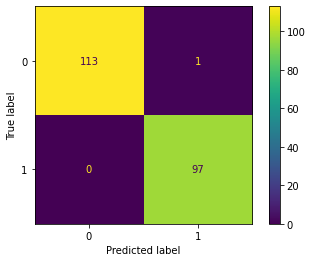

In [ ]:
# melakukan Prediksi dengan Model dan Hyperparameter terbaik terhadap Test dataset
grid_SVM_prediction = grid.predict(X_test)

# mengevaluasi skor akurasi
print(metrics.balanced_accuracy_score(y_test, grid_SVM_prediction))
print(metrics.classification_report(y_test, grid_SVM_prediction))

# plot Hasil Prediksi terhadap Test dataset ke dalam Confusion Matrix
metrics.plot_confusion_matrix(grid, X_test, y_test)  
plt.show()

# Deployment

Deployment dilakukan dengan terlebih dahulu menyimpan model dengan skor akurasi terbaik (terhadap Test dataset). Dari eksperimen sebelumnya, dihasilkan beberapa model yang menghasilkan skor akurasi 0.978, 0.996, dan 1.0 . Untuk deployment ini, model yang akan dipilih adalah sebagai berikut.

Hasil **eksperimen Decision Tree - Skenario 4**: GridSearchCV, MinMaxScaler,  Cross-validation (5 folds)

Criterion: 'gini'

Splitter: 'random'

Max_depth: 11

cv: 5

Hal ini dikarenakan model dengan akurasi 1.0 dapat dikatakan cenderung _overfitting_ sehingga lebih baik menggunakan model dengan akurasi yang tidak mencapai 1.0

In [ ]:
grid_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid={'criterion':['gini'],
                                                                                         'splitter':['random'],
                                                                                         'max_depth':[11]}, 
                                  scoring='balanced_accuracy', cv=5)
grid_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [11],
                         'splitter': ['random']},
             scoring='balanced_accuracy')

In [ ]:
modelName = 'modelDecisionTree_graduateAdmission.sav'
pickle.dump(grid_decision_tree, open(modelName, 'wb'))

Lalu, download model tersebut dan dilanjut dengan proses deployment.

# Kesimpulan

Sejauh ini, telah dilakukan **langkah-langkah eksperimen berikut** untuk memprediksi probabilitas *Graduate Admission* menggunakan algoritma **Decision Tree** dan **SVM**.

1. Mengganti **missing values** dengan **mean** dan **mode** 
2. Membuat **kolom Target (kategorikal / 0 dan 1)** yakni **admittedOrNot** dari kolom chanceOfAdmit dengan **threshold = 0.9**.
3. Menggunakan **features**: GRE, TOEFL, UnivRating, SOP, LOR, CGPA, Research
4. Melakukan **Random Oversampling** untuk **mengatasi _data imbalance_** pada kolom Target, yakni dengan menyamakan jumlah kelas 1 dengan jumlah kelas 0 (masing-masing menjadi 351 data).
5. Melakukan **Scaling** untuk menyetarakan range nilai pada data _features_ menggunakan **MinMaxScaler** dan **StandardScaler**
6. Selalu menggunakan **random_state = 42** dalam eksperimen ini.
7. **Eksperimen** menggunakan algoritma **DecisionTreeClassifier** (_decision tree_) dan **SVC** (_SVM_) dengan **5 skenario** berikut.


*   Skenario 1: Default, tidak mengubah hyperparameter dan MinMaxScaler
*   Skenario 2: Manual (dengan for loop), MinMaxScaler, No Cross-validation
*   Skenario 3: Manual (dengan for loop), StandardScaler, No Cross-validation
*   Skenario 4: GridSearchCV, MinMaxScaler, Cross-validation (5 folds)
*   Skenario 5: GridSearchCV, StandardScaler, Cross-validation (5 folds)



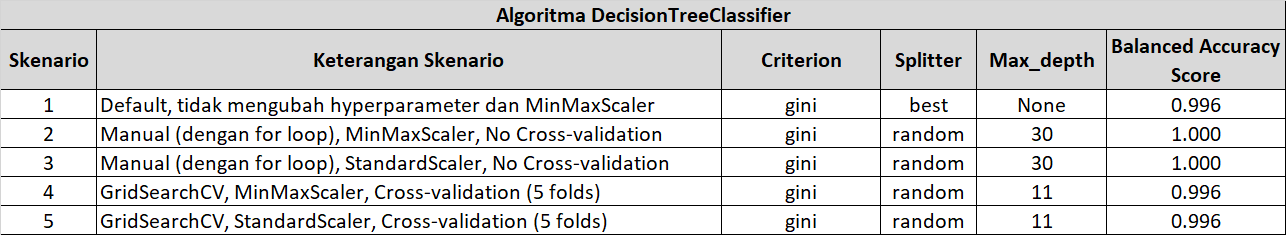

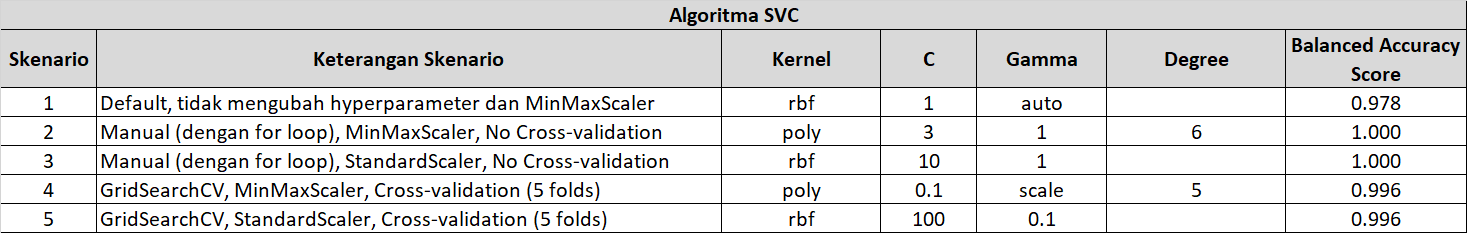

Dari eksperimen tersebut, didapatkan bahwa :

a. **MinMaxScaler dan StandardScaler** menghasilkan **skor akurasi** yang **sama** di kedua algoritma.

b. Eksperimen **No Cross-validation menghasilkan akurasi yang lebih tinggi** di kedua algoritma **daripada _cross validation_ menggunakan GridSearchCV**. Apabila skor akurasi terhadap _cross validation set_ lebih rendah, hal ini **menandakan adanya _overfitting_** pada model.

c. Dengan **Skenario Default**, **akurasi DecisionTreeClassifier lebih tinggi** daripada SVC.